1) [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a
single input variable. Using f_classif from sklearn, identify the input variables with the
worst and best discriminative power. Plot their class-conditional probability density
functions.

Input variable with the best discriminative power: Glucose
Input variable with the worst discriminative power: BloodPressure


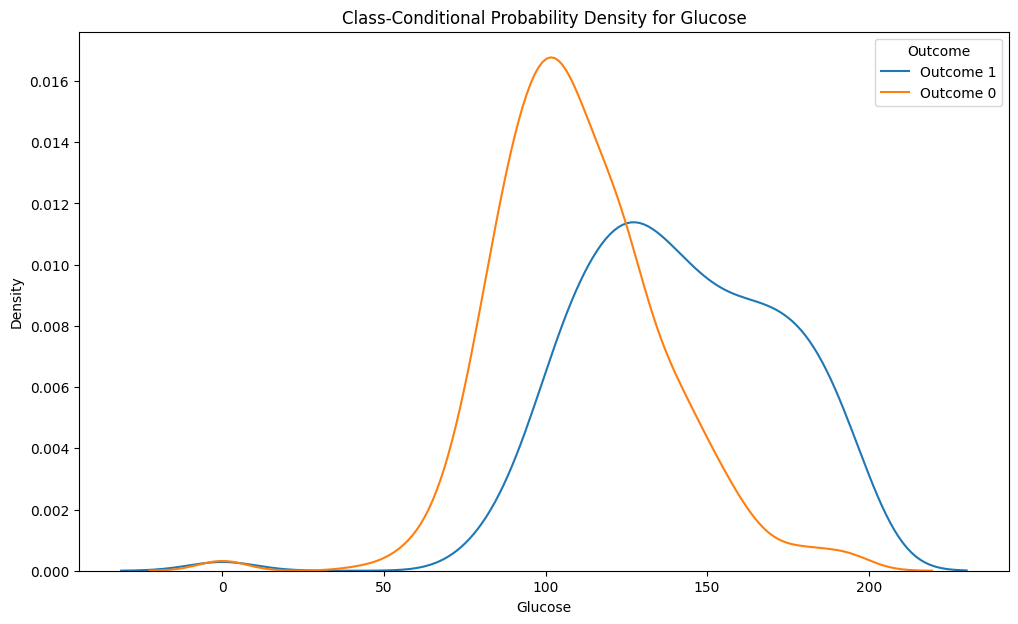

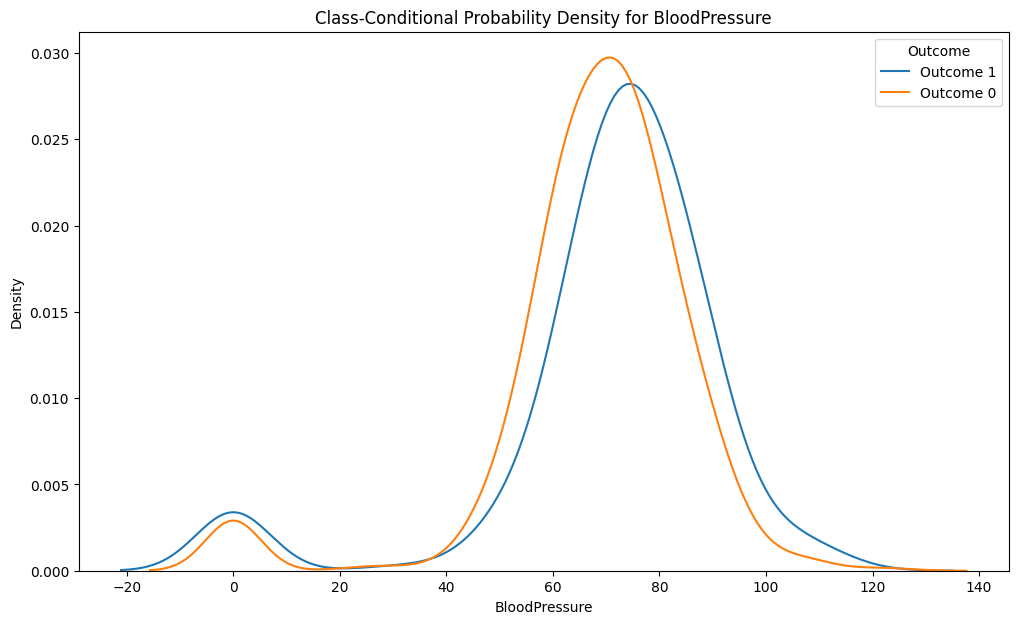

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from scipy.io.arff import loadarff

# Reading file
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')
# Separate features from the outcome (class)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
fcalss = f_classif(X, y) 

best_index = fcalss[0].argmax()
worst_index = fcalss[0].argmin()

best_power, worst_power = X.columns[best_index], X.columns[worst_index]

print('Input variable with the best discriminative power:',best_power)
print('Input variable with the worst discriminative power:', worst_power)
classes = df['Outcome'].unique()

plt.figure(figsize=(12, 7))
for target_class in classes:
    subset = df[df['Outcome'] == target_class]
    sns.kdeplot(subset[best_power], label=f'Outcome {target_class}')
plt.xlabel(best_power)
plt.ylabel('Density')
plt.title(f'Class-Conditional Probability Density for {best_power}')
plt.legend(title='Outcome')
plt.show()


plt.figure(figsize=(12, 7))
for target_class in classes:
    subset = df[df['Outcome'] == target_class]
    sns.kdeplot(subset[worst_power], label=f'Outcome {target_class}')
plt.xlabel(worst_power)
plt.ylabel('Density')
plt.title(f'Class-Conditional Probability Density for {worst_power}')
plt.legend(title='Outcome')
plt.show()

2) [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1),
assess in a single plot both the training and testing accuracies of a decision tree with
minimum sample split in and the remaining parameters as default.
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per
parameterization.

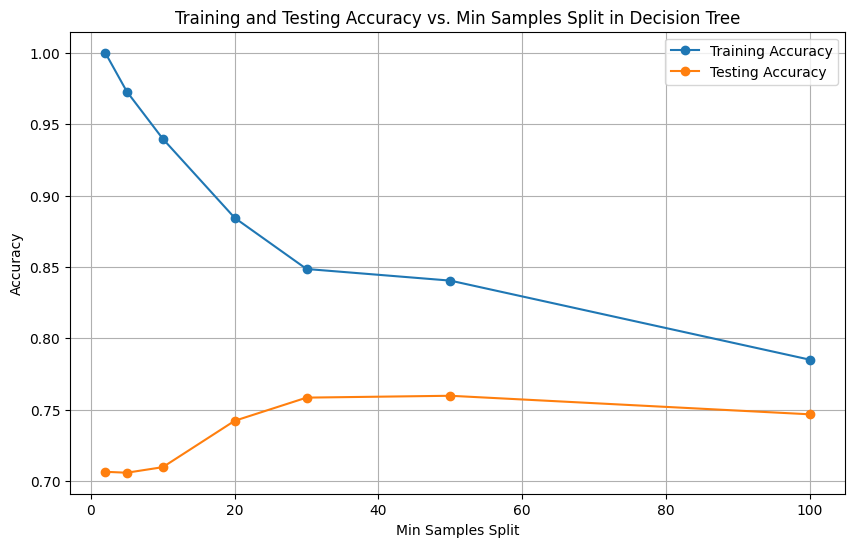

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

# Load the dataset
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')
# Separate features from the outcome (class)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Minimum sample split values to assess
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

# Arrays to hold training and testing accuracies
train_accuracies = []
test_accuracies = []

# Perform 10 runs to average results
for min_sample_split in min_samples_splits:
    train_acc = []
    test_acc = []

    # Repeat the training process 10 times to average the results
    for _ in range(10):
        # Perform an 80-20 train-test split, stratified by the target variable
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1)

        # Initialize and train the decision tree with the given min_samples_split
        clf = DecisionTreeClassifier(min_samples_split=min_sample_split)
        clf.fit(X_train, y_train)

        # Compute and store accuracies for both training and testing sets
        train_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))

    # Average the accuracy over the 10 runs
    train_accuracies.append(np.mean(train_acc))
    test_accuracies.append(np.mean(test_acc))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy vs. Min Samples Split in Decision Tree')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


3) [2v] Critically analyze these results, including the generalization capacity across settings

Em valores baixos de "Min Samples Split" como 2, o modelo opera em overfitting, levando a um nível muito alto de acurácia no treinamento, quase 100%. Por outro lado a acurácia de teste é baixa (aproximadamente 70%). Quando o desempenho com os dados treinamento é alto, mas com os de teste é baixo, isso indica que o modelo está excessivamente dependente dos dados de treinamento e não consegue se generalizar bem para novos dados detetando muito ruido.

À medida que o valor de "Min Samples Split" aumenta, a estrutura do modelo vais se simplificando, o que leva a uma queda lenta na acurácia do treinamento. A partir deste ponto, até ao valor de 40 para "Min Samples Split", a acurácia de teste sobe progressivamente, atingindo sua eficácia máxima ao redor de 40, onde o modelo generaliza melhor. Neste estágio, a diferença entre as acurácias de treinamento e de teste é pequena, sendo este o ponto ideal de complexidade do modelo. O modelo, nesta fase, captura os padrões relevantes sem sofrer de overfitting.

Se o valor de "Min Samples Split" for alto ,como 50, a acurácia de treinamento e de teste começam a diminuir, indicando que o modelo está a sofrer de underfitting. Ou seja, o modelo torna-se tão simplificado que nem se consegue ajustar adequadamente os dados de treinamento. Isso resulta em uma diminuição do desempenho tanto com os dados de treinamento quanto com os de teste.

4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree
(random_state=1) using all available data and ensuring that the maximum depth would be 3
in order to avoid overfitting risks.

i. Plot the decision tree.

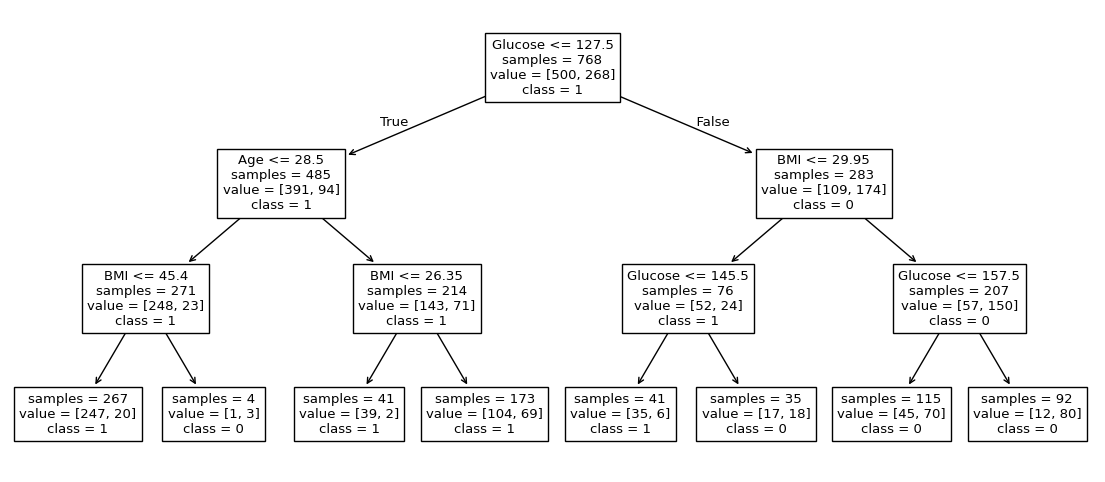

In [3]:
from scipy.io.arff import loadarff
from sklearn.tree import plot_tree, DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
# Reading file
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# learn classifier
predictor = DecisionTreeClassifier(max_depth=3, random_state=1)
predictor.fit(X, y)

class_names = df['Outcome'].unique()

figure = plt.figure(figsize=(14, 6))
plot_tree(predictor, feature_names=X.columns, 
class_names=class_names, impurity=False)

plt.show()

ii. Explain what characterizes diabetes by identifying the conditional associations
together with their posterior probabilities.

Se o nível de glicose for menor ou igual a 127.5, a probabilidade de diabetes é alta.
Essa regra baseia-se no seu primeiro nó de decisão, onde um nível de glicose abaixo de 127.5 leva a uma probabilidade alta de diabetes.

Se a idade for menor ou igual a 28.5 e o nível de glicose for maior que 127.5, a probabilidade de diabetes ainda pode ser alta, mas outros fatores como o IMC podem influenciar.
Essa regra considera a interação entre idade e nível de glicose, como indicado na sua árvore.

Se o IMC for maior que 29.95 e o nível de glicose for maior que um determinado valor (por exemplo, 145.5), a probabilidade de diabetes é alta.
Essa regra destaca a importância do IMC, especialmente em combinação com níveis elevados de glicose.

Em suma, o nível de glicose é o principal indicador: Valores altos de glicose estão fortemente associados à diabetes.
Idade e IMC também são importantes: Pessoas mais jovens e com IMC elevado tendem a ter maior risco.
A combinação de diferentes fatores (idade, glicose, IMC) pode aumentar ou diminuir o risco de diabetes.
